# Lander checks.
Notebook just to check that the lander data are correctly archived as we are not archiving to a high process level just yet.

This higher processing relies heavily on the turbo_tools package. This was an existing package from PhD work, and I have no particular drive at present to move this into pIMOS. 


In [1]:
import xarray as xr
import datetime, warnings
import matplotlib.pyplot as plt 
import numpy as np 
import zutils.time as ztime

from pIMOS.xrwrap.nortek_vector import NORTEK_VECTOR, num2date_lk
from pIMOS.xrwrap.nortek_signature import NORTEK_SIGNATURE, num2date_lk
import importlib 
import pIMOS 
importlib.reload(pIMOS.xrwrap.nortek_vector)
from pIMOS.xrwrap.nortek_vector import NORTEK_VECTOR, num2date_lk

def pto_plot(pto, type='xyz', xl=None):
    
    if type in ['xyz', '*']:
        plt.figure(figsize=(16, 3))
        plt.plot(pto.time, pto.vel_x)
        plt.plot(pto.time, pto.vel_y)
        plt.plot(pto.time, pto.vel_z)
        plt.ylabel('Vel [m/s]')
        plt.grid()
        if xl is None:
            plt.xlim([pto.time[0], pto.time[-1]])
        else:
            plt.xlim(xl)
        plt.ylim([-1, 1])
        plt.title('XYZ')
        
    if type in ['enu', '*']:
        plt.figure(figsize=(16, 3))
        plt.plot(pto.time, pto.vel_enu[0, :])
        plt.plot(pto.time, pto.vel_enu[1, :])
        plt.plot(pto.time, pto.vel_enu[2, :])
        plt.ylabel('Vel [m/s]')
        plt.grid()
        if xl is None:
            plt.xlim([pto.time[0], pto.time[-1]])
        else:
            plt.xlim(xl)
        plt.ylim([-1, 1])
        plt.title('ENU')
        
    if type in ['beam', '*']:
        plt.figure(figsize=(16, 3))
        plt.plot(pto.time, pto.vel_beam[0, :])
        plt.plot(pto.time, pto.vel_beam[1, :])
        plt.plot(pto.time, pto.vel_beam[2, :])
        plt.ylabel('Vel [m/s]')
        plt.grid()
        if xl is None:
            plt.xlim([pto.time[0], pto.time[-1]])
        else:
            plt.xlim(xl)
        plt.ylim([-0.25, 0.25])
        plt.title('BEAM')
        

<class 'datetime.datetime'>
Module tested
<class 'datetime.datetime'>
Time vector is well spaced
<class 'numpy.datetime64'>
Time vector is well spaced
There are 101 elements in this 10 second period spaced at 0.1.
Time Module OK


c:\users\azulberti\dropbox\university\phd\03_code\source_code\turbo_tools\turbo_tools\utils\time.py:182: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ans = linspacetime(pd.datetime.today(), pd.datetime.today()+datetime.timedelta(1), n=100)
c:\users\azulberti\dropbox\university\phd\03_code\source_code\turbo_tools\turbo_tools\utils\time.py:189: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ans = linspacetime(pd.datetime.today(), pd.datetime.today()+dt, dt_s=dt_s)
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


[[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]


# Signature 1000


In [2]:
ds_sig = xr.open_dataset(r'E:\Experiments\kissme17\Archive_FV01\Signature 1000/[KISSME2017]_[KISSME_REC]_[SP250-Lander]_[35]_[Signature 1000]_[10046000]_[ens2000000-2400000].nc')
ds_sig


<xarray.Dataset>
Dimensions:                   (beam: 5, cartesian_axes: 3, height: 115, time: 400000)
Coordinates:
  * beam                      (beam) int32 1 2 3 4 5
  * cartesian_axes            (cartesian_axes) int32 1 2 3
  * height                    (height) float64 0.1 0.3 0.5 ... 22.5 22.7 22.9
  * time                      (time) datetime64[ns] 2017-04-02T22:26:40.06339...
    lat_nom                   float64 ...
    lon_nom                   float64 ...
    z_nom                     float64 ...
Data variables: (12/21)
    vel_dolfyn                (beam, height, time) float32 ...
    vel_enu                   (cartesian_axes, height, time) float32 ...
    vel_xyz                   (cartesian_axes, height, time) float32 ...
    four_beam_error_velocity  (height, time) float64 ...
    pressure                  (time) float32 ...
    temperature               (time) float32 ...
    ...                        ...
    qc_velocity               (beam, height, time) float32 ...
    qc_velocity3              (cartesian_axes, height, time) float64 ...
    qc_temperature            (time) float32 ...
    qc_pressure               (time) float32 ...
    qc_compass                (time) float32 ...
    qc_tilt                   (time) float32 ...
Attributes: (12/33)
    title:                           Measured data from a Nortek Signature
    institution:                     The University of Western Australia
    institution_division:            Ocean Dynamics
    source:                          Nortek Signature ADCP
    project:                         KISSME2017
    history:                         
    ...                              ...
    nominal_site_depth:              -252.0
    pressure_sensor_height_asb:      
    nominal_instrument_height_asb:   0.35
    nominal_instrument_orientation:  
    timezone:                        UTC
    is_profile_data:                 0

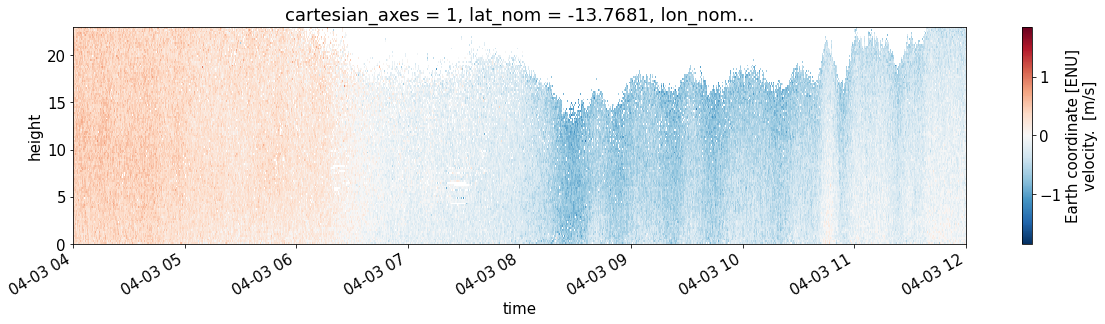

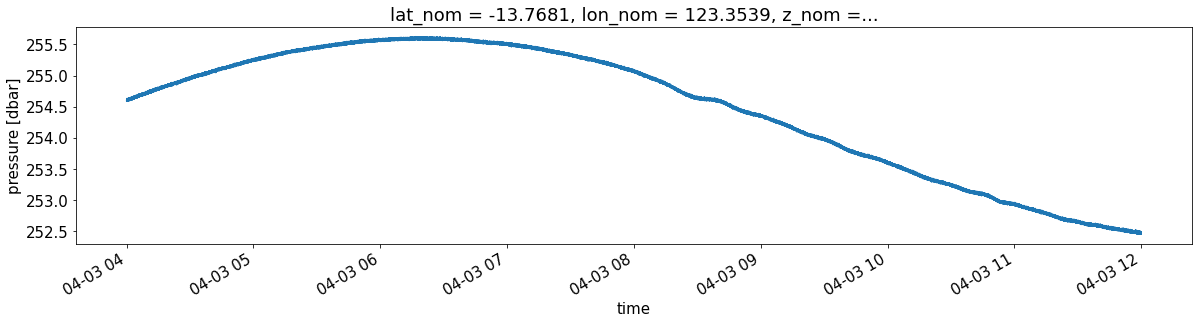

In [56]:
start = datetime.datetime(2017, 4, 3, 4, 0, 0, 0)
end = datetime.datetime(2017, 4, 3, 12, 0, 0, 0)
ds_sig_ = ds_sig.sel(time=slice(start, end))

plt.figure(figsize=(20, 4))
ds_sig_.vel_enu[0, :, :].plot()

plt.figure(figsize=(20, 4))
ds_sig_.pressure.plot()

In [4]:
rrSig = NORTEK_SIGNATURE(ds_sig_)

Initialising accessor.
STORING RAW FILE ATTRIBUTES


In [6]:
tpoSig = rrSig.to_pto(calc_mean=True)

Initialising with length 230401
Initialised.
<class 'numpy.datetime64'>
Time vector is well spaced
Running mean calcs


c:\users\azulberti\dropbox\university\phd\03_code\source_code\turbo_tools\turbo_tools\classes\adcp_object.py:130: RuntimeWarning: Mean of empty slice
  mean_vel_e[:, bb] = np.nanmean(tpo.ds.vel_e[:, ind], axis=1)
c:\users\azulberti\dropbox\university\phd\03_code\source_code\turbo_tools\turbo_tools\classes\adcp_object.py:131: RuntimeWarning: Mean of empty slice
  mean_vel_n[:, bb] = np.nanmean(tpo.ds.vel_n[:, ind], axis=1)
c:\users\azulberti\dropbox\university\phd\03_code\source_code\turbo_tools\turbo_tools\classes\adcp_object.py:132: RuntimeWarning: Mean of empty slice
  mean_vel_u[:, bb] = np.nanmean(tpo.ds.vel_u[:, ind], axis=1)


TPO complete


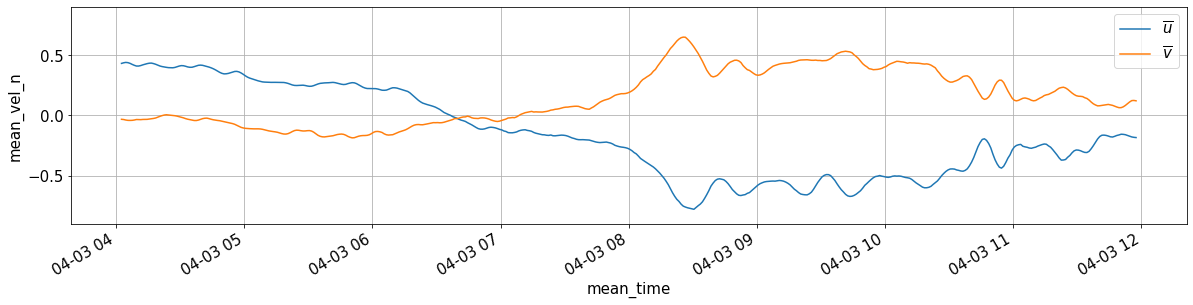

In [7]:
plt.figure(figsize=(20, 4))
np.mean(tpoSig.ds['mean_vel_e'], axis=0).plot(label='$\overline{u}$')
np.mean(tpoSig.ds['mean_vel_n'], axis=0).plot(label='$\overline{v}$')
plt.ylim([-0.9, 0.9])
plt.grid()
plt.legend()



# Vector 6019

In [8]:
ds_v6019 = xr.open_dataset(r'E:\Experiments\kissme17\Archive_FV01\Nortek Vector/[KISSME2017]_[KISSME_REC]_[SP250-Lander]_[49]_[Nortek Vector]_[601900]_[].nc')
ds_v6019_ = ds_v6019.sel(time=slice(start, end))


In [11]:
ds_v6019_ = ds_v6019.sel(time=slice(start, end))
ds_v6019_

rr6019 = NORTEK_VECTOR(ds_v6019_)
h = None
p = None
r = None

warnings.warn('APPLY TO KISSME 6019 ONLY!!!')
p6019 = 0.3349
r6019 = 1.9945

pto6019 = rr6019.to_pto(pitch=p6019, 
                        roll=r6019, 
                        heading=h, 
                        ori='up', 
                        phase_unwrap=True,
                        despike=True,
                        calc_mean=True)


Initialising accessor.
STORING RAW FILE ATTRIBUTES
Initialising with length 1843142
<class 'numpy.datetime64'>
Time vector is well spaced
Initialised.
Running unwrap
Unwrapping
This still needs to be confirmed


<ipython-input-11-013473928de3>:9: UserWarning: APPLY TO KISSME 6019 ONLY!!!
  warnings.warn('APPLY TO KISSME 6019 ONLY!!!')


Doing incomplete block.
Phase unwrapping comlete.
Running despike
Despiking
Nans in the intial data set: 0
Running mean calcs
PTO complete


This still needs to be confirmed
This still needs to be confirmed
This still needs to be confirmed


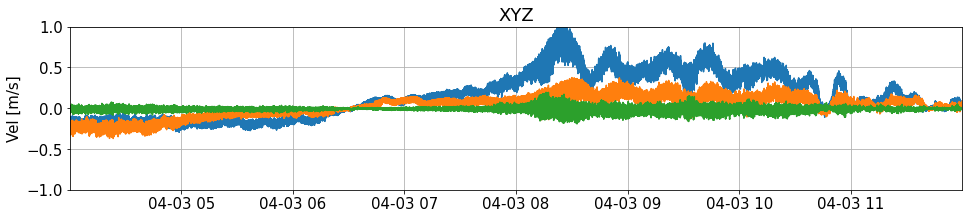

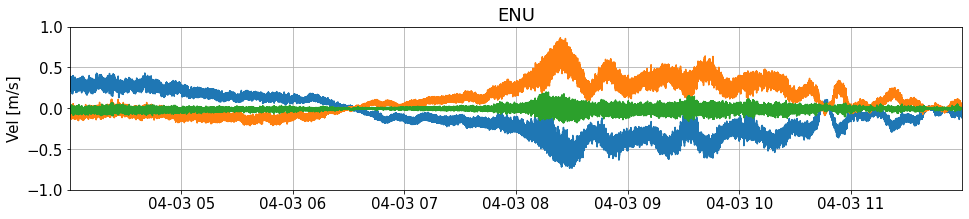

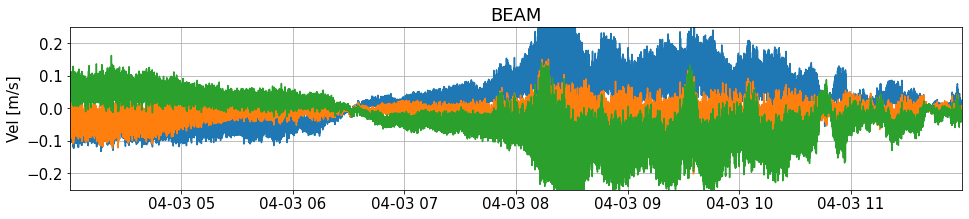

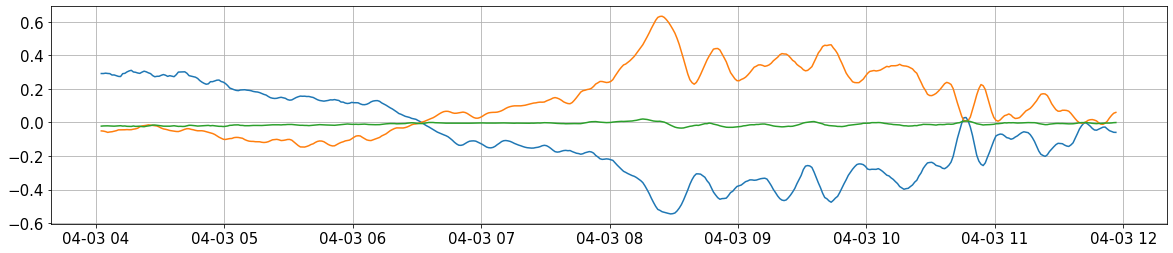

In [12]:
pto_plot(pto6019, '*')

plt.figure(figsize=(20, 4))
plt.plot(pto6019.mean_time, pto6019.mean_vel_enu.T)
plt.grid()

# Vec 6329 now

In [16]:
ds_v6329 = xr.open_dataset(r'E:\Experiments\kissme17\Archive_FV01\Nortek Vector/[KISSME2017]_[KISSME_REC]_[SP250-Lander]_[143]_[Nortek Vector]_[632900]_[].nc')
ds_v6329_ = ds_v6329.sel(time=slice(start, end))


In [17]:
rr6329 = NORTEK_VECTOR(ds_v6329_)

h = None
p = None
r = None

pto6329 = rr6329.to_pto(date_lims=[start, end], 
                        pitch=p, 
                        roll=r, 
                        heading=h, 
                        ori='down', 
                        phase_unwrap=True,
                        despike=True,
                        calc_mean=True)


Initialising accessor.
STORING RAW FILE ATTRIBUTES
Initialising with length 1843142
<class 'numpy.datetime64'>
Time vector is well spaced
Initialised.
Running unwrap
Unwrapping
This still needs to be confirmed
Doing incomplete block.
Phase unwrapping comlete.
Running despike
Despiking
Nans in the intial data set: 0
Running mean calcs
PTO complete


This still needs to be confirmed
This still needs to be confirmed
This still needs to be confirmed


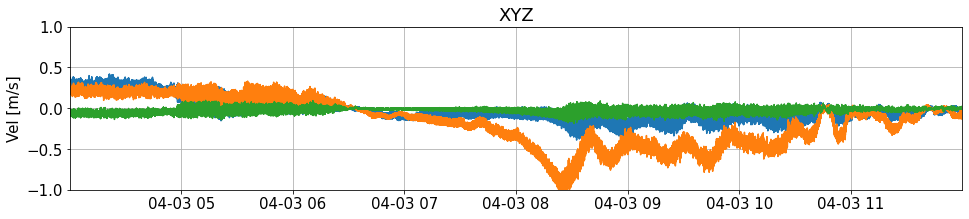

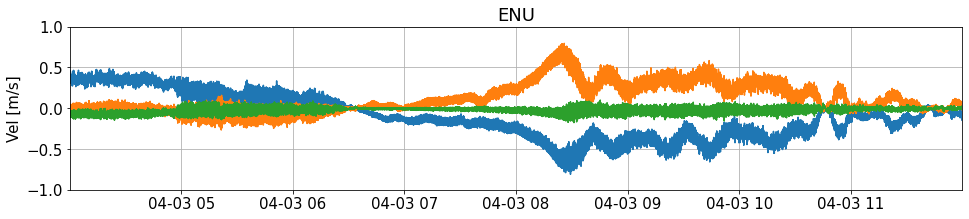

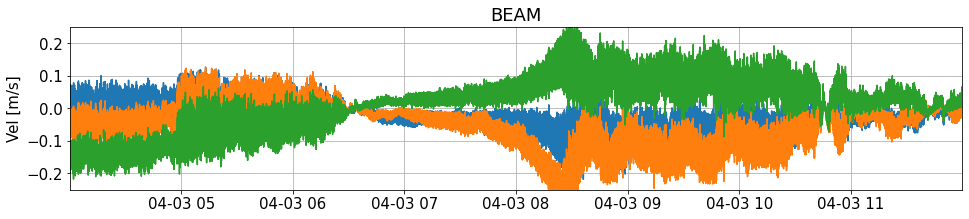

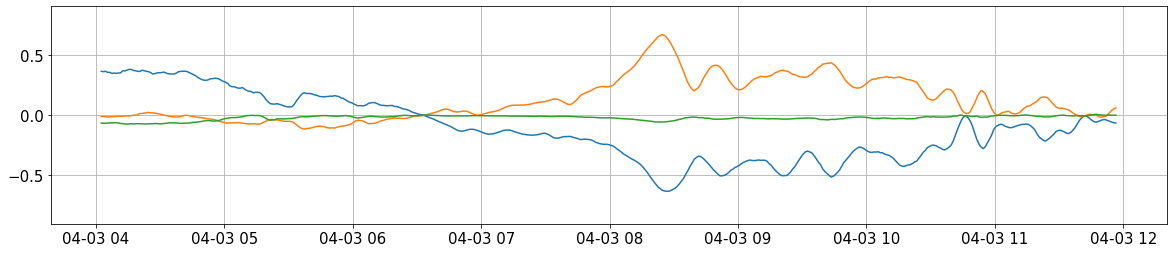

In [18]:
pto_plot(pto6329, '*')

plt.figure(figsize=(20, 4))
plt.plot(pto6329.mean_time, pto6329.mean_vel_enu.T)
plt.ylim([-0.9, 0.9])
plt.grid()

# All together now

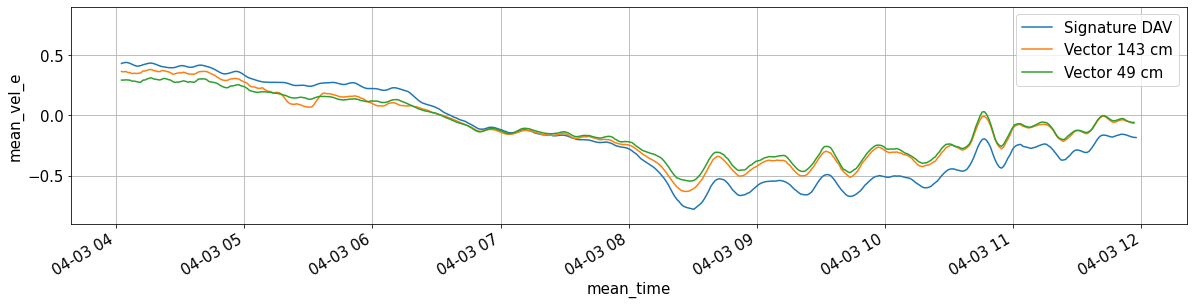

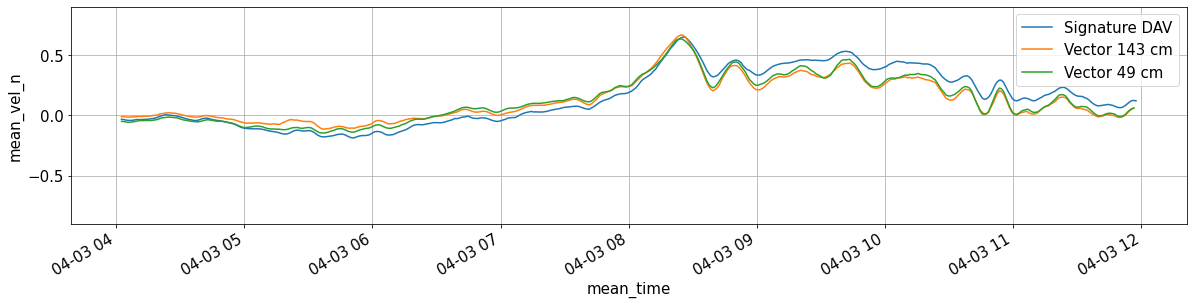

In [22]:
plt.figure(figsize=(20, 4))
# np.mean(ds_sig_.vel_enu[0, :, :], axis=0).plot()
np.mean(tpoSig.ds['mean_vel_e'], axis=0).plot(label='Signature DAV')
plt.plot(pto6329.mean_time, pto6329.mean_vel_enu.T[:, 0], label='Vector 143 cm')
plt.plot(pto6019.mean_time, pto6019.mean_vel_enu.T[:, 0], label='Vector 49 cm')
plt.ylim([-0.9, 0.9])
plt.grid()
plt.legend()

plt.figure(figsize=(20, 4))
# np.mean(ds_sig_.vel_enu[1, :, :], axis=0).plot()
np.mean(tpoSig.ds['mean_vel_n'], axis=0).plot(label='Signature DAV')
plt.plot(pto6329.mean_time, pto6329.mean_vel_enu.T[:, 1], label='Vector 143 cm')
plt.plot(pto6019.mean_time, pto6019.mean_vel_enu.T[:, 1], label='Vector 49 cm')
plt.ylim([-0.9, 0.9])
plt.grid()
plt.legend()


# Turbulence

In [43]:
# pto6019.calculate_epsilon()
# pto6329.calculate_epsilon()
pto6019.calculate_stress()
pto6329.calculate_stress()

Stress calc 0
Stress calc 1
Stress calc 2
Stress calc 3
Stress calc 4
Stress calc 5
Stress calc 6
Stress calc 7
Stress calc 8
Stress calc 9
Stress calc 10
Stress calc 11
Stress calc 12
Stress calc 13
Stress calc 14
Stress calc 15
Stress calc 16
Stress calc 17
Stress calc 18
Stress calc 19
Stress calc 20
Stress calc 21
Stress calc 22
Stress calc 23
Stress calc 24
Stress calc 25
Stress calc 26
Stress calc 27
Stress calc 28
Stress calc 29
Stress calc 30
Stress calc 31
Stress calc 32
Stress calc 33
Stress calc 34
Stress calc 35
Stress calc 36
Stress calc 37
Stress calc 38
Stress calc 39
Stress calc 40
Stress calc 41
Stress calc 42
Stress calc 43
Stress calc 44
Stress calc 45
Stress calc 46
Stress calc 47
Stress calc 48
Stress calc 49
Stress calc 50
Stress calc 51
Stress calc 52
Stress calc 53
Stress calc 54
Stress calc 55
Stress calc 56
Stress calc 57
Stress calc 58
Stress calc 59
Stress calc 60
Stress calc 61
Stress calc 62
Stress calc 63
Stress calc 64
Stress calc 65
Stress calc 66
Stres

Stress calc 58
Stress calc 59
Stress calc 60
Stress calc 61
Stress calc 62
Stress calc 63
Stress calc 64
Stress calc 65
Stress calc 66
Stress calc 67
Stress calc 68
Stress calc 69
Stress calc 70
Stress calc 71
Stress calc 72
Stress calc 73
Stress calc 74
Stress calc 75
Stress calc 76
Stress calc 77
Stress calc 78
Stress calc 79
Stress calc 80
Stress calc 81
Stress calc 82
Stress calc 83
Stress calc 84
Stress calc 85
Stress calc 86
Stress calc 87
Stress calc 88
Stress calc 89
Stress calc 90
Stress calc 91
Stress calc 92
Stress calc 93
Stress calc 94
Stress calc 95
Stress calc 96
Stress calc 97
Stress calc 98
Stress calc 99
Stress calc 100
Stress calc 101
Stress calc 102
Stress calc 103
Stress calc 104
Stress calc 105
Stress calc 106
Stress calc 107
Stress calc 108
Stress calc 109
Stress calc 110
Stress calc 111
Stress calc 112
Stress calc 113
Stress calc 114
Stress calc 115
Stress calc 116
Stress calc 117
Stress calc 118
Stress calc 119
Stress calc 120
Stress calc 121
Stress calc 122
St

(0.0001, 0.01)

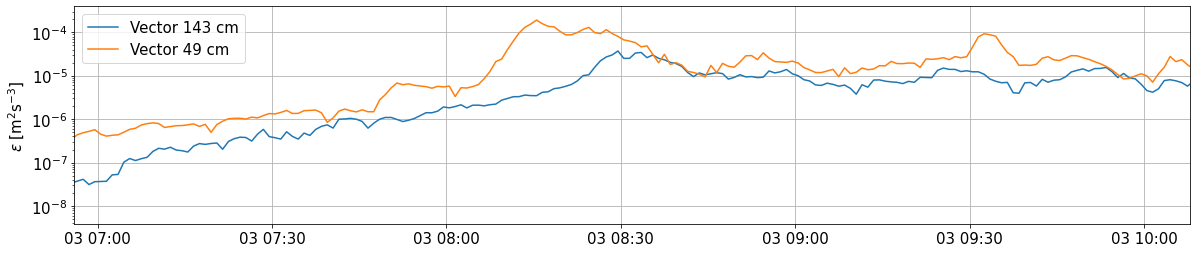

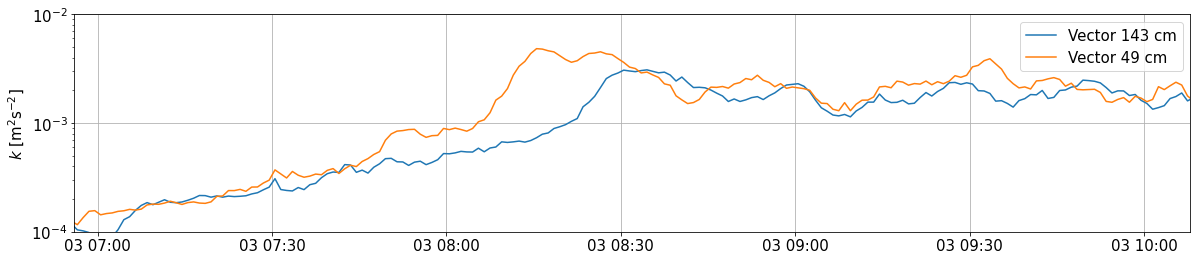

In [53]:
plt.figure(figsize=(20, 4))
plt.plot(pto6329.mean_time, pto6329.eps, label='Vector 143 cm')
plt.plot(pto6019.mean_time, pto6019.eps, label='Vector 49 cm')
plt.grid()
plt.legend()
plt.yscale('log')
plt.xlim(datetime.datetime(2017, 4, 3, 6, 56), datetime.datetime(2017, 4, 3, 10, 8))
plt.ylabel('$\epsilon$ [m$^2$s$^{-3}$]')

plt.figure(figsize=(20, 4))
plt.plot(pto6329.mean_time, pto6329.stress_tensor_enu.k, label='Vector 143 cm')
plt.plot(pto6019.mean_time, pto6019.stress_tensor_enu.k, label='Vector 49 cm')
plt.grid()
plt.legend()
plt.yscale('log')
plt.xlim(datetime.datetime(2017, 4, 3, 6, 56), datetime.datetime(2017, 4, 3, 10, 8))
plt.ylabel('$k$ [m$^2$s$^{-2}$]')
plt.ylim([1e-4, 1e-2])
